# Project: Telco Churn Prediction 
# Name: Kalum De Alwis
# Index: 265

Objective: Prdic whether customer will churn based on features

Data set: WA_Fn-UseC_-Telco-Customer-Churn.csv

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file_path= 'D:\D\OneDrive - Dialog Axiata PLC\Documents.1\Documents\OfficeDocs\Training\ML\Exam\Project\WA_Fn-UseC_-Telco-Customer-Churn.csv'
# Load CSV File
data = pd.read_csv(file_path)
data.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2719,4295-YURET,Female,1,Yes,Yes,56,Yes,No,DSL,Yes,...,No,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),72.60,4084.35,No
3730,6771-XWBDM,Female,0,Yes,No,57,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),104.50,5921.35,Yes
1080,0301-KOBTQ,Male,0,No,No,32,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.05,614.45,No
36,6047-YHPVI,Male,0,No,No,5,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,69.70,316.9,Yes
6250,3705-RHRFR,Female,0,Yes,No,69,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,Two year,No,Bank transfer (automatic),99.15,6875.35,No


In [3]:
print(data.shape)
data.info()
data.columns


(7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
#drop any ull values
data.dropna(how='any', axis=0, inplace=True)
# convert numric stored as string to numeric
data2=data.query('TotalCharges == " "')
data=data.query('TotalCharges != " "')
data2.size
data.astype({'TotalCharges':'float64'}).dtypes


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

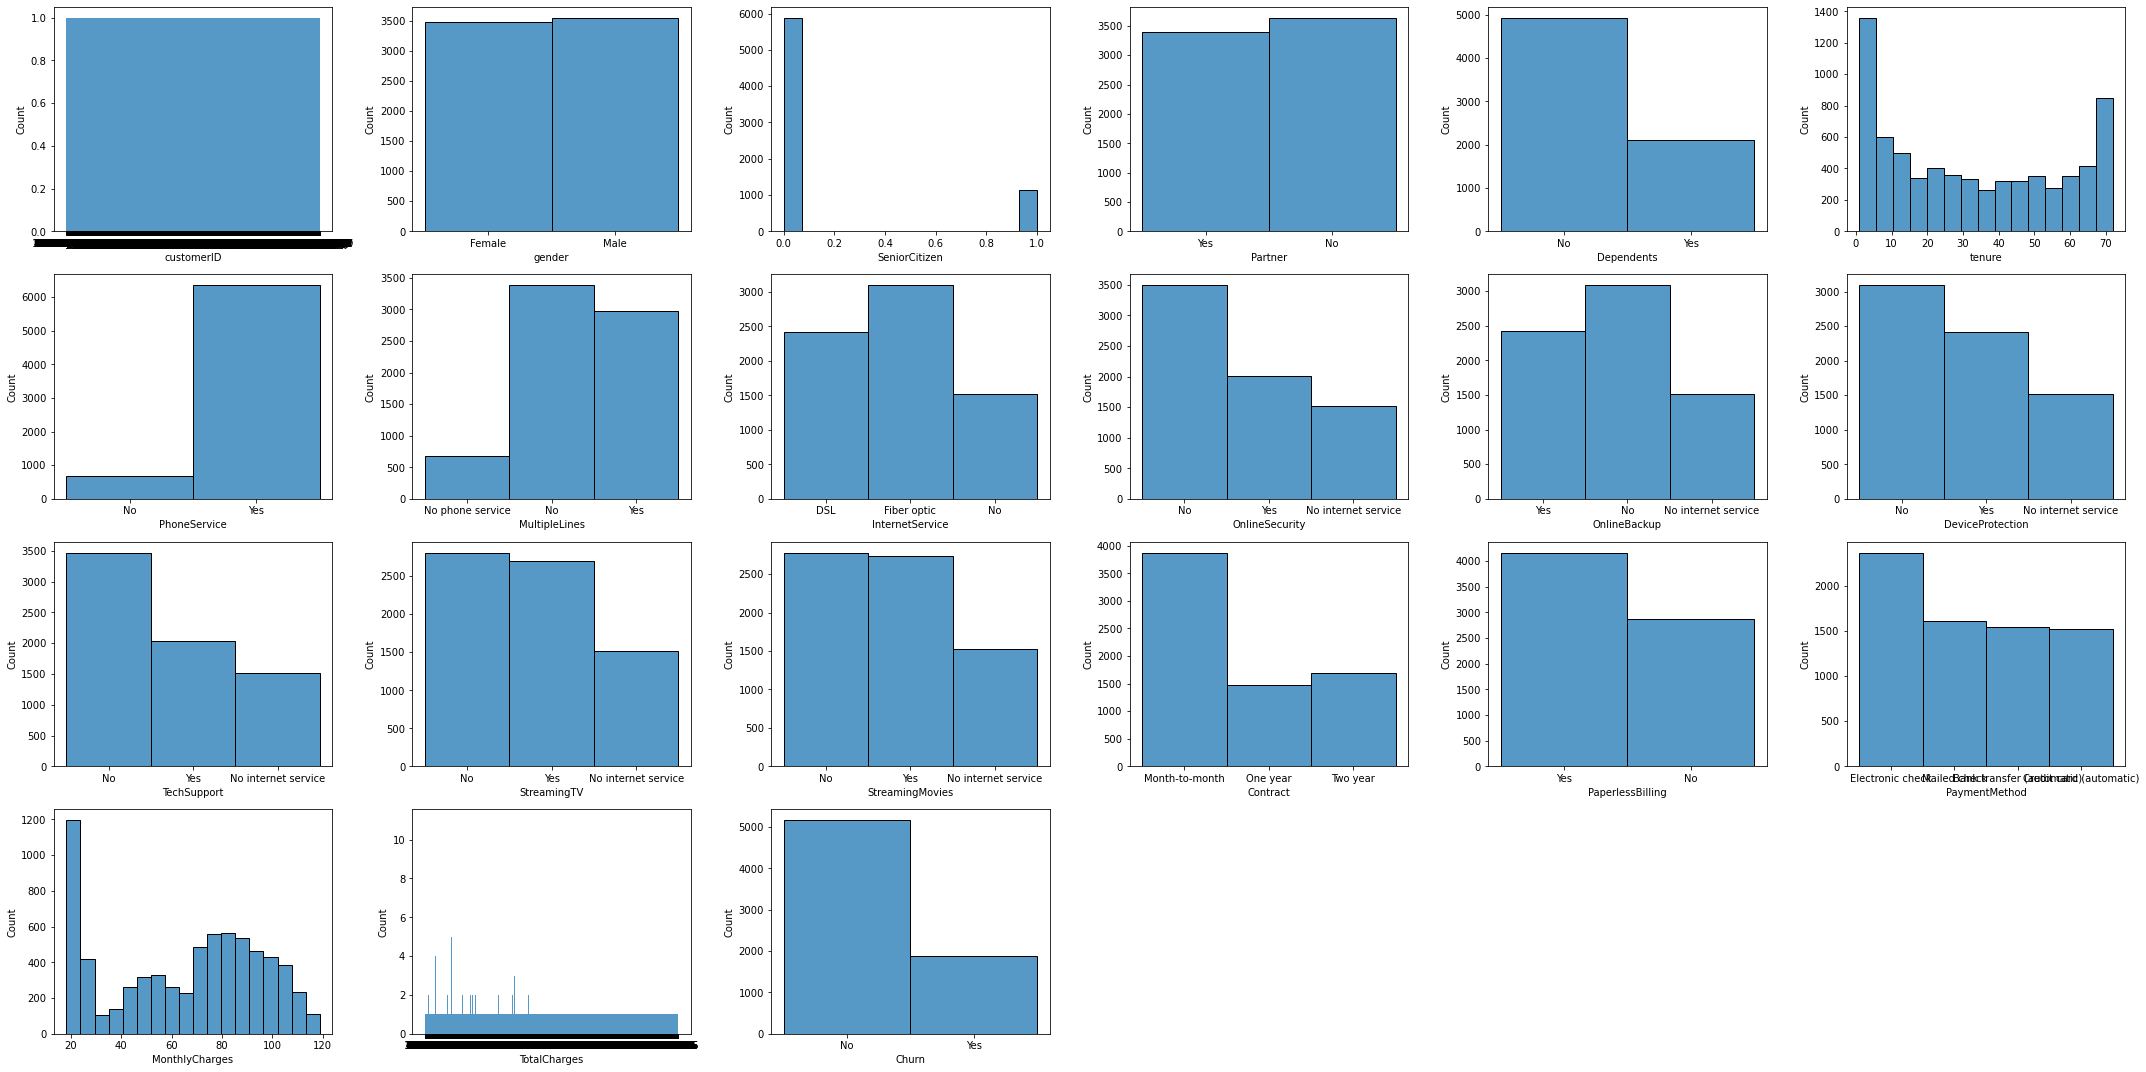

In [230]:
# plot histograms
plt.figure(figsize=(30, 15))
# for loop to interate through columns
for i, column in enumerate(data.columns):
    plt.subplot(4, 6, i + 1)
    sns.histplot(data=data[column])
# showing the graphs
plt.tight_layout()
plt.show()

Check whether target variable samples are bias

In [5]:
data['Churn'].value_counts()


No     5163
Yes    1869
Name: Churn, dtype: int64

In [6]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [142]:
#Convert CatgoricalTo Numerical values in Featureset            
featureset= ['gender', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']          
#CatgoricalToNumericalvalues(featureset)

# bellow function assing integer value starting from 0 on wards to catergorical values in the passed feature list of the passed dataset
def CatgoricalToNumerical(data,Featureset):
    CatergoryAssinment=pd.DataFrame({'Feature':[],'Catergeryvalue':[],'numericvalue':[]}) # to return mapping of catergory assinged for futre use
    for p in Featureset:
        featurename=p
        valuesset=data[featurename].unique()
        cattonum=0 # variable to hold next numrical value to assinge to catergory
        for q in valuesset:
            data[featurename]=data[featurename].replace(q,cattonum)   
            CatergoryAssinment.loc[len(CatergoryAssinment.index)]=[featurename,q,cattonum]
            cattonum=cattonum+1
        #data[featurename]=data[featurename].replace(uniquevaluelist,encorderlist)
    return CatergoryAssinment

CatergoryAssinment=CatgoricalToNumerical(data,featureset)
data.sample(5) 
CatergoryAssinment

#from KalumEssential import CatgoricalToNumerical as cn
#CatergoryAssinment=cn(data,featureset)
#print(CatergoryAssinment)

,Feature,Catergeryvalue,numericvalue
0,gender,0.0,0.0
1,gender,1.0,1.0
2,Partner,0.0,0.0
3,Partner,1.0,1.0
4,Dependents,0.0,0.0
...,...,...,...
76,PaymentMethod,1.0,1.0
77,PaymentMethod,2.0,2.0
78,PaymentMethod,3.0,3.0
79,Churn,0.0,0.0


        customerID    gender  SeniorCitizen   Partner  Dependents     tenure  \
min     0002-ORFBO  0.000000       0.000000  0.000000    0.000000   0.000000   
max     9995-HOTOH  1.000000       1.000000  1.000000    1.000000  71.000000   
mean           NaN  0.504693       0.162400  0.517491    0.298493  43.094994   
median         NaN  1.000000       0.000000  1.000000    0.000000  48.000000   
std            NaN  0.500014       0.368844  0.499729    0.457629  23.507754   

        PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
min         0.000000       0.000000         0.000000        0.000000  ...   
max         1.000000       2.000000         2.000000        2.000000  ...   
mean        0.903299       1.325228         0.872582        0.718857  ...   
median      1.000000       1.000000         1.000000        1.000000  ...   
std         0.295571       0.642585         0.737271        0.796556  ...   

        DeviceProtection  TechSupport  StreamingTV  Stre

<AxesSubplot:>

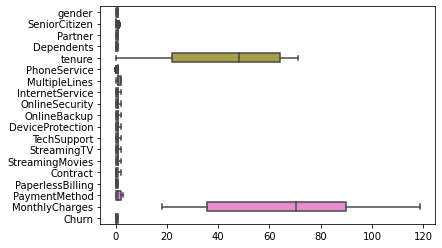

In [11]:
print(data.agg(['min','max','mean','median','std',])) # in the output should look at features where mean is not balanced between min and max 
sns.boxplot(data=data,orient='h')


In [12]:
correlation_matrix = data.corr()
correlation_matrix

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
gender,1.000000,-0.001819,0.001379,0.010349,-0.001744,-0.007515,-0.010284,-0.002236,-0.004365,0.011081,0.004526,0.000057,0.000578,-0.001339,0.000095,0.011902,-0.004928,-0.013779,-0.008545
SeniorCitizen,-0.001819,1.000000,-0.016957,-0.210550,0.012885,0.008392,0.113769,-0.032160,-0.210546,-0.144762,-0.156700,-0.223438,-0.129721,-0.120658,-0.141820,-0.156258,-0.093712,0.219874,0.150541
Partner,0.001379,-0.016957,1.000000,-0.452269,-0.077529,-0.018397,-0.118037,-0.000513,-0.081078,0.091536,-0.093391,-0.068277,-0.079066,-0.075310,-0.294094,-0.013957,-0.133280,-0.097825,0.149982
Dependents,0.010349,-0.210550,-0.452269,1.000000,0.042777,-0.001078,-0.019178,0.044030,0.188889,0.061970,0.154819,0.179176,0.138809,0.125086,0.240556,0.110131,0.124002,-0.112343,-0.163128
tenure,-0.001744,0.012885,-0.077529,0.042777,1.000000,-0.017489,0.047066,-0.014820,-0.008205,-0.047096,0.002926,0.008612,0.008235,0.015742,0.031685,-0.030131,0.057176,0.052279,-0.125920
PhoneService,-0.007515,0.008392,-0.018397,-0.001078,-0.017489,1.000000,0.674824,0.387266,0.125544,0.129432,0.138938,0.123533,0.171773,0.164379,0.003019,-0.016696,-0.003106,0.248033,0.011691
MultipleLines,-0.010284,0.113769,-0.118037,-0.019178,0.047066,0.674824,1.000000,0.186852,-0.066695,-0.130978,-0.012819,-0.066814,0.030524,0.027944,0.084037,-0.133538,0.026248,0.491412,0.036148
InternetService,-0.002236,-0.032160,-0.000513,0.044030,-0.014820,0.387266,0.186852,1.000000,0.607412,0.650084,0.662685,0.609422,0.712715,0.708336,0.099579,0.138166,0.008851,-0.322173,-0.047097
OnlineSecurity,-0.004365,-0.210546,-0.081078,0.188889,-0.008205,0.125544,-0.066695,0.607412,1.000000,0.621270,0.748684,0.790951,0.701526,0.704672,0.389138,0.333656,0.214330,-0.620532,-0.332443
OnlineBackup,0.011081,-0.144762,0.091536,0.061970,-0.047096,0.129432,-0.130978,0.650084,0.621270,1.000000,0.600952,0.616520,0.603551,0.606037,0.034745,0.260691,0.003786,-0.710175,-0.073934


#ML model building

In [13]:

X_variables = ['gender', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','MonthlyCharges','SeniorCitizen','TotalCharges']
y_variable = 'Churn'

#Train\Test split of data

In [14]:
from sklearn import tree
from sklearn.model_selection import train_test_split

X = data[X_variables]
y = data[y_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
#############################################################
print("X_train size:", X_train.shape[0])
print("X_test size:", X_test.shape[0])

X_train size: 4922
X_test size: 2110


#Model training Function and model training

In [128]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

def KalModeltrain(model,modelreferencename,X_train, X_test, y_train, y_test):
   model.fit(X_train, y_train)
   y_pred = model.predict(X_test)
   y_pred_prob = model.predict_proba(X_test)[:, 1]
   test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred, 'y_pred_prob':y_pred_prob})
   
   from sklearn import metrics
   accuracy = metrics.accuracy_score(test_result['y_act'], test_result['y_pred']) 
   precision = metrics.precision_score(test_result['y_act'], test_result['y_pred'], average='binary', pos_label=1)
   f1_score = metrics.f1_score(test_result['y_act'], test_result['y_pred'], average='weighted')  #weighted accounts for label imbalance.
   roc_auc = metrics.roc_auc_score(test_result['y_act'], test_result['y_pred_prob'])
   recallvalue = metrics.recall_score(results['Y_Actual'], results['Y_Predicted']) 
   return ({'model_name':modelreferencename, 
                   'model':model, 
                   'accuracy':accuracy, 
                   'precision':precision,
                  'f1_score':f1_score,
                  'roc_auc':roc_auc, 
                  'recall_val':recallvalue })

Modellist=[] # array to hold details of all the models
   # models training using above functon
Modellist.append(KalModeltrain(RandomForestClassifier(max_depth=100),'RFModel1', X_train, X_test, y_train, y_test))
Modellist.append(KalModeltrain(RandomForestClassifier(max_depth=200),'RFModel2', X_train, X_test, y_train, y_test))
Modellist.append(KalModeltrain(RandomForestClassifier(max_depth=50),'RFModel3', X_train, X_test, y_train, y_test))
Modellist.append(KalModeltrain(LogisticRegression(max_iter=300),'LogModel1', X_train, X_test, y_train, y_test)  )
   ################
Modellist=pd.DataFrame(Modellist)
Modellist

,model_name,model,accuracy,precision,f1_score,roc_auc,recall_val
0,RFModel1,"(DecisionTreeClassifier(max_depth=100, max_fea...",0.792417,0.633257,0.784037,0.824879,0.464865
1,RFModel2,"(DecisionTreeClassifier(max_depth=200, max_fea...",0.784834,0.619952,0.774507,0.821455,0.464865
2,RFModel3,"(DecisionTreeClassifier(max_depth=50, max_feat...",0.782938,0.617433,0.771757,0.823859,0.464865
3,LogModel1,LogisticRegression(max_iter=300),0.788152,0.615880,0.781865,0.832325,0.464865


Visualize model

# model evaluation, selecting best model

In [139]:
bestmodel=Modellist.query("model_name =='RFModel1'")
bestmodel
bestmodel=bestmodel['model'].values[0]

#Identify significant features of the selected model

In [140]:
d={'Feture Name': bestmodel.feature_names_in_, 'Featureimportance': bestmodel.feature_importances_}
d=pd.DataFrame(data=d)
print(d.sort_values(by='Featureimportance',ascending=False))

         Feture Name  Featureimportance
18      TotalCharges           0.204934
16    MonthlyCharges           0.169308
3             tenure           0.126523
13          Contract           0.087023
15     PaymentMethod           0.062009
7     OnlineSecurity           0.045677
10       TechSupport           0.042145
0             gender           0.028672
14  PaperlessBilling           0.027526
8       OnlineBackup           0.025776
5      MultipleLines           0.025115
6    InternetService           0.024132
1            Partner           0.022592
9   DeviceProtection           0.022515
17     SeniorCitizen           0.021340
2         Dependents           0.020371
11       StreamingTV           0.019944
12   StreamingMovies           0.019528
4       PhoneService           0.004870


#Model  Export/Save to deploy

In [135]:
import joblib

save_file = 'model_rf3.joblib'
joblib.dump(bestmodel, open(save_file, 'wb'))

#Sample code to load model

In [68]:
# loading from file
model_fromsavedfile = joblib.load(save_file)
model_fromsavedfile

RandomForestClassifier()

#Load and use model on new user data

In [143]:
# loading from file
LoadedModel=  joblib.load(save_file)
LoadedModel

RandomForestClassifier(max_depth=50)

In [152]:
sample_input = data[['gender', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','MonthlyCharges','SeniorCitizen','TotalCharges']].sample(10)
sample_input

,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,SeniorCitizen,TotalCharges
1454,1,0,1,25,1,1,2,2,2,2,2,2,2,0,0,1,20.65,0,654.85
5290,0,0,1,16,0,0,0,1,0,0,1,1,1,2,1,2,59.70,0,4122.65
3248,1,0,0,6,1,2,1,0,1,0,0,0,1,0,0,0,86.65,1,856.65
4137,0,0,1,12,1,1,2,2,2,2,2,2,2,0,0,3,20.10,0,232.4
6686,1,0,0,20,1,2,1,0,0,1,1,1,1,2,0,3,109.75,0,7758.9
367,0,1,0,0,1,1,2,2,2,2,2,2,2,0,1,1,19.15,0,19.15
3080,1,1,0,2,0,0,0,0,1,0,0,0,0,0,1,1,24.30,0,38.45
731,1,1,0,5,1,1,2,2,2,2,2,2,2,0,1,1,20.35,0,92.75
3046,0,0,0,37,1,2,1,0,1,1,1,1,1,1,0,2,103.30,0,6518.35
2048,1,1,0,17,1,1,1,0,1,1,0,1,1,0,0,2,96.80,1,2030.3


In [153]:
xx=LoadedModel.predict_proba(sample_input)
sample_input['prediction']=xx[:,1]
sample_input

,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,SeniorCitizen,TotalCharges,prediction
1454,1,0,1,25,1,1,2,2,2,2,2,2,2,0,0,1,20.65,0,654.85,0.070
5290,0,0,1,16,0,0,0,1,0,0,1,1,1,2,1,2,59.70,0,4122.65,0.010
3248,1,0,0,6,1,2,1,0,1,0,0,0,1,0,0,0,86.65,1,856.65,0.830
4137,0,0,1,12,1,1,2,2,2,2,2,2,2,0,0,3,20.10,0,232.4,0.160
6686,1,0,0,20,1,2,1,0,0,1,1,1,1,2,0,3,109.75,0,7758.9,0.020
367,0,1,0,0,1,1,2,2,2,2,2,2,2,0,1,1,19.15,0,19.15,0.015
3080,1,1,0,2,0,0,0,0,1,0,0,0,0,0,1,1,24.30,0,38.45,0.140
731,1,1,0,5,1,1,2,2,2,2,2,2,2,0,1,1,20.35,0,92.75,0.040
3046,0,0,0,37,1,2,1,0,1,1,1,1,1,1,0,2,103.30,0,6518.35,0.090
2048,1,1,0,17,1,1,1,0,1,1,0,1,1,0,0,2,96.80,1,2030.3,0.470
